In [ ]:
import sys
sys.path.append('../../')

In [ ]:
#from SynRBL.SynChemImputer.functional_group_checker import FunctionalGroupChecker
from rdkit import Chem

class UnstableMol:
    @staticmethod
    def functional_group_check(smiles):
        if FunctionalGroupChecker.check_vicinal_diol(smiles):
            return 'vicinal_diol'
        elif FunctionalGroupChecker.check_enol(smiles):
            return 'enol'
        elif FunctionalGroupChecker.check_hemiacetal(smiles):
            return 'hemiacetal'
        elif FunctionalGroupChecker.check_carbonate(smiles):
            return 'carbonate'
        else:
            return None

    @staticmethod
    def fix(smiles):
        functional_group = UnstableMol.functional_group_check(smiles)
        print(functional_group)
        if functional_group == 'vicinal_diol':
            smiles = smiles.replace('OCO', 'C=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'hemiacetal':
            smiles = smiles.replace('COCO', 'CO.C=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'enol':
            smiles = smiles.replace('C=C(O)', 'CC=O')
            return Chem.MolFromSmiles(smiles)
        elif functional_group == 'carbonate':
            smiles = smiles.replace('COC(=O)O', 'CO.OC(=O)O').replace('OC(=O)OC', 'COC(=O)O.OC')
            return Chem.MolFromSmiles(smiles)
        else:
            return None


In [ ]:
smi_diol = 'OCO'
smi_enol = 'C=C(O)'
smi_hemiacetal = 'COCO'
smi_carbonate = 'COC(=O)O'

In [ ]:
from thermo.functional_groups import *
from rdkit import Chem

In [ ]:
is_alcohol(Chem.MolFromSmiles('COCO')) 

In [ ]:
Chem.MolFromSmiles('C1=CC=CC=C1O')

In [ ]:
UnstableMol.fix(smi_diol)

In [ ]:
UnstableMol.fix(smi_enol)

In [ ]:
UnstableMol.fix(smi_carbonate)

In [ ]:
from rdkit import Chem

class FunctionalGroupChecker:
    
    # 1. peroxid group
    @staticmethod
    def check_peroxide(smiles: str) -> bool:
        """
        Check for the presence of a peroxide substructure in a molecule.
        """
        peroxide_pattern = Chem.MolFromSmarts('OO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(peroxide_pattern) if mol and not FunctionalGroupChecker.check_peracid(smiles) else False

    @staticmethod
    def check_peracid(smiles: str) -> bool:
        """
        Check for the presence of a peracid substructure in a molecule.
        """
        peracid_pattern = Chem.MolFromSmarts('C(OO)=O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(peracid_pattern) if mol else False

    # 2. Alcohol group
    @staticmethod
    def check_alcohol(smiles: str) -> bool:
        """
        Check for the presence of an alcohol functional group in a molecule.
        """
        alcohol_pattern = Chem.MolFromSmarts('CO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(alcohol_pattern) if mol else False
    
    @staticmethod
    def check_enol(smiles: str) -> bool:
        """
        Check for the presence of an enol functional group in a molecule.
        """
        enol_pattern = Chem.MolFromSmarts('C=C(O)')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(enol_pattern) if mol else False

    @staticmethod
    def check_phenol(smiles: str) -> bool:
        """
        Check for the presence of a phenol functional group in a molecule.
        """
        phenol_pattern = Chem.MolFromSmarts('[c]O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(phenol_pattern) if mol else False

    @staticmethod
    def check_vicinal_diol(smiles: str) -> bool:
        """
        Check for the presence of a vicinal diol functional group in a molecule.
        """
        vicinal_diol_pattern = Chem.MolFromSmarts('OCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(vicinal_diol_pattern) if mol and not FunctionalGroupChecker.check_hemiacetal(smiles)  and not FunctionalGroupChecker.check_carbonate(smiles) and not FunctionalGroupChecker.check_carboxylic_acid(smiles) and not FunctionalGroupChecker.check_ester(smiles) else False

    @staticmethod
    def check_gem_diol(smiles: str) -> bool:
        """
        Check for the presence of a gem diol functional group in a molecule.
        """
        gem_diol_pattern = Chem.MolFromSmarts('OCCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(gem_diol_pattern) if mol else False

    @staticmethod
    def check_ether(smiles: str) -> bool:
        """
        Check for the presence of an ether functional group in a molecule.
        """
        ether_pattern = Chem.MolFromSmarts('COC')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ether_pattern) if mol else False

    # 3. Carbonyl group
    @staticmethod
    def check_aldehyde(smiles: str) -> bool:
        """
        Check for the presence of an aldehyde functional group in a molecule.
        """
        aldehyde_pattern = Chem.MolFromSmarts('[CX3H1](=O)[#6]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(aldehyde_pattern) if mol else False

    @staticmethod
    def check_ketone(smiles: str) -> bool:
        """
        Check for the presence of a ketone functional group in a molecule.
        """
        ketone_pattern = Chem.MolFromSmarts('[#6][CX3](=O)[#6]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ketone_pattern) if mol else False

    @staticmethod
    def check_acetal(smiles: str) -> bool:
        """
        Check for the presence of an acetal functional group in a molecule.
        """
        acetal_pattern = Chem.MolFromSmarts('[CX4][OX2][CX4]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(acetal_pattern) if mol else False

    @staticmethod
    def check_hemiacetal(smiles: str) -> bool:
        """
        Check for the presence of a hemiacetal functional group in a molecule.
        """
        hemiacetal_pattern = Chem.MolFromSmarts('COCO')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(hemiacetal_pattern) if mol and not FunctionalGroupChecker.check_carbonate(smiles) and not FunctionalGroupChecker.check_carboxylic_acid(smiles) and not FunctionalGroupChecker.check_ester(smiles) else False

    # 4. Carboxylic group
    @staticmethod
    def check_carboxylic_acid(smiles: str) -> bool:
        """
        Check for the presence of a carboxylic acid functional group in a molecule.
        """
        carboxylic_acid_pattern = Chem.MolFromSmarts('C(=O)O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(carboxylic_acid_pattern) if mol else False

    @staticmethod
    def check_ester(smiles: str) -> bool:
        """
        Check for the presence of an ester functional group in a molecule.
        """
        ester_pattern = Chem.MolFromSmarts('C(=O)OC')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(ester_pattern) if mol and not FunctionalGroupChecker.check_carbonate(smiles) else False

    @staticmethod
    def check_amide(smiles: str) -> bool:
        """
        Check for the presence of an amide functional group in a molecule.
        """
        amide_pattern = Chem.MolFromSmarts('NC=O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(amide_pattern) if mol and not FunctionalGroupChecker.check_urea(smiles) else False
    
    @staticmethod
    def check_cyanide(smiles: str) -> bool:
        """
        Check for the presence of a cyanide functional group in a molecule.
        """
        cyanide_pattern = Chem.MolFromSmarts('[C-]#[N+]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(cyanide_pattern) if mol else False

    @staticmethod
    def check_urea(smiles: str) -> bool:
        """
        Check for the presence of a urea functional group in a molecule.
        """
        urea_pattern = Chem.MolFromSmarts('NC(=O)N')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(urea_pattern) if mol else False

    @staticmethod
    def check_carbonate(smiles: str) -> bool:
        """
        Check for the presence of a carbonate functional group in a molecule.
        """
        carbonate_pattern = Chem.MolFromSmarts('OC(=O)O')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(carbonate_pattern) if mol else False

    # 5. Amine group
    @staticmethod
    def check_amine(smiles: str) -> bool:
        """
        Check for the presence of an amine functional group in a molecule.
        """
        amine_pattern = Chem.MolFromSmarts('CN')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(amine_pattern) if mol and not FunctionalGroupChecker.check_amide(smiles) else False
    
    @staticmethod
    def check_nitro(smiles: str) -> bool:
        """
        Check for the presence of a nitro functional group in a molecule.
        """
        nitro_pattern = Chem.MolFromSmarts('[N+](=O)[O-]')
        mol = Chem.MolFromSmiles(smiles)
        return mol.HasSubstructMatch(nitro_pattern) if mol else False


In [ ]:
Chem.MolToSmarts(Chem.MolFromSmiles('OC(=O)O'))

In [ ]:
def oxygen_group_check(smiles):
    alcohol_pattern = Chem.MolFromSmarts('CO')
    phenol_pattern = Chem.MolFromSmarts('[c]O')
    mol = Chem.MolFromSmiles(smiles)
    if mol.HasSubstructMatch(phenol_pattern):
        return 'phenol'
    elif mol.HasSubstructMatch(alcohol_pattern):
        enol_pattern = Chem.MolFromSmarts('C=C-O')
        diol_pattern = Chem.MolFromSmarts('OCO')
        amid_pattern = Chem.MolFromSmarts('NC=O')
        #acyl_pattern = [Chem.MolFromSmarts(f'C(=O){X}') for X in ['F','Cl','Br','I']]
        if mol.HasSubstructMatch(enol_pattern):
            return 'enol'
        elif mol.HasSubstructMatch(diol_pattern):
            ()
        elif mol.HasSubstructMatch(amid_pattern):
            return 'amide'
        else:
            return 'alcohol'
    else:
        return None
       

In [ ]:
def carboxylic_derivatives_check(smiles):
    mol = Chem.MolFromSmiles(smiles)
    ester_pattern = Chem.MolFromSmarts('C(=O)OC')
    acid_pattern = Chem.MolFromSmarts('C(=O)O')
    anhydride_pattern = Chem.MolFromSmarts('O=COC=O')
    if mol.HasSubstructMatch(ester_pattern):
        return 'ester'
    elif mol.HasSubstructMatch(anhydride_pattern):
        return 'anhydride'
    else:
        return 'acid'
    

In [ ]:
def COO_check(smiles):
    mol = Chem.MolFromSmiles(smiles)
    carbon_pattern = Chem.MolFromSmarts('C')
    oxygen_pattern = Chem.MolFromSmarts('O')
    if mol.HasSubstructMatch(carbon_pattern):
        return 'carbon'
    elif mol.HasSubstructMatch(oxygen_pattern):
        return 'oxygen'
    else:
        return None

In [ ]:
Chem.MolFromSmiles('C(=O)OC(=O)')

In [ ]:
Chem.CanonSmiles('C(=O)OC(=O)')

In [70]:
from SynRBL.rsmi_utils import load_database
golden = load_database('../../Data/Validation_set/golden_dataset/MCS/Final_Graph.json.gz')

In [ ]:
len(golden)

In [ ]:
data = load_database('../../Data/Validation_set/golden_dataset/mcs_based_reactions.json.gz')
len(data)

In [14]:
#from SynRBL.SynMCSImputer.SubStructure.extract_common_mcs import ExtractMCS
from SynRBL.SynUtils.data_utils import load_database, save_database

mcs_dir = '../../Data/Validation_set/golden_dataset/MCS'
condition_1 = load_database(f'{mcs_dir}/Condition_1.json.gz')
condition_2 = load_database(f'{mcs_dir}/Condition_2.json.gz')
condition_3 = load_database(f'{mcs_dir}/Condition_3.json.gz')
condition_4 = load_database(f'{mcs_dir}/Condition_4.json.gz')
condition_5 = load_database(f'{mcs_dir}/Condition_5.json.gz')



In [ ]:
mcs

In [68]:
from collections import Counter
import pandas as pd
from rdkit import Chem
from joblib import Parallel, delayed
from typing import List, Dict, Tuple

class ExtractMCS:
    """
    A class to extract and analyze the most common Maximum Common Substructure (MCS) from a list of MCS results.
    Provides functionality to determine the most common elements, the top n common elements, and to calculate
    the corrected individual overlap percentage for multiple conditions. Additionally, extracts the MCS results
    that meet a specified threshold for commonality.
    """
    def __init__(self):
        pass

    @staticmethod
    def get_num_atoms(smiles):
        """
        Calculate the number of atoms in a molecule represented by a SMILES string.

        Args:
        smiles (str): A string representing a molecule in SMILES format.

        Returns:
        int: The number of atoms in the molecule. Returns 0 if the SMILES string is invalid or an error occurs.
        """
        try:
            molecule = Chem.MolFromSmarts(smiles)
            if molecule is not None:
                return molecule.GetNumAtoms()
            else:
                return 0
        except:
            return 0
    
    @staticmethod
    def calculate_total_number_atoms_mcs_parallel(condition, n_jobs=4):
        """
        Calculate the total number of atoms in the MCS results for each dictionary in a condition using parallel processing.

        Args:
        condition (list): A list of dictionaries, each containing 'mcs_results', which are lists of SMILES strings.
        n_jobs (int, optional): The number of jobs to run in parallel. Defaults to 4.

        Returns:
        list: A list containing the total number of atoms in the MCS results for each dictionary in the condition.
        """
        def calculate_atoms_for_dict(d):
            return sum(ExtractMCS.get_num_atoms(mcs) for mcs in d['mcs_results'])

        total_number_atoms = Parallel(n_jobs=n_jobs)(delayed(calculate_atoms_for_dict)(d) for d in condition)
        return total_number_atoms
    
    
    def get_popular_elements_from_list(self, elements_list):
        """
        Get the most popular elements in a flat list.

        :param elements_list: A list containing elements.
        :return: A list of elements that appear with the highest frequency in the provided list.
        """
        element_count = Counter(elements_list)
        max_frequency = max(element_count.values(), default=0)
        return [element for element, count in element_count.items() if count == max_frequency]

    def get_top_n_common_elements(self, elements_list, top_n=2):
        """
        Get the top n most common elements from a list of sets.

        :param elements_list: A list of sets, each containing elements.
        :param top_n: The number of top elements to retrieve.
        :return: A list of the top n most common elements across all sets.
        """
        flattened_elements = [element for element_set in elements_list for element in element_set]
        return [element for element, _ in Counter(flattened_elements).most_common(top_n)]

    def calculate_corrected_individual_overlap_percentage(self, *conditions):
        """
        Calculate the corrected individual overlap percentage across multiple conditions.

        :param conditions: A variable number of conditions, each a list of dictionaries containing 'mcs_results'.
        :return: A list of overlap percentages for each index across the conditions.
        :raises ValueError: If all conditions do not have the same number of cases.
        """
        if not all(len(condition) == len(conditions[0]) for condition in conditions):
            raise ValueError("All conditions must have the same number of cases")

        num_conditions = len(conditions)
        list_overlap_percentages = []
        reference_results_list = []

        for idx in range(len(conditions[0])):
            list_length = [len(condition[idx]['mcs_results']) for condition in conditions]
            len_popular = self.get_popular_elements_from_list(list_length)[0]
            current_results = [set(condition[idx]['mcs_results']) for condition in conditions]
            reference_results = self.get_top_n_common_elements(current_results, top_n=len_popular)
            reference_results_list.append(reference_results)
            overlap_count = sum(sorted(reference_results) == sorted(set(condition[idx]['mcs_results'])) for condition in conditions)
            overlap_percentage = (overlap_count / num_conditions) * 100
            list_overlap_percentages.append(overlap_percentage)

        return list_overlap_percentages, reference_results_list

    def extract_common_mcs_index(self, lower_threshold,upper_threshold, *conditions):
        """
        Extract MCS results that meet a specified threshold for commonality.

        :param threshold: The percentage threshold for commonality.
        :param conditions: A variable number of conditions, each a list of dictionaries containing 'mcs_results'.
        :return: A list of dictionaries representing the MCS results that meet the specified threshold.
        """
        overlap_percentages, reference_results_list = self.calculate_corrected_individual_overlap_percentage(*conditions)
        threshold_index = [lower_threshold <= i <= upper_threshold for i in overlap_percentages]
        #mcs_common = [d for d, b in zip(conditions[0], threshold_index) if b]
        return threshold_index, reference_results_list
    
    @staticmethod
    def compare_conditions_and_get_largest(total_atoms_conditions: List[List[int]], *conditions: List[List[Dict]]) -> Tuple[List[Dict], List[List[str]]]:
        """
        Compare the total number of atoms across different conditions and find the condition with the largest MCS for each index.
        In case of a tie, compares the total number of atoms in the first SMILES/SMARTS for those conditions.

        Args:
        - total_atoms_conditions (list): A list of lists, where each sublist contains the total number of atoms for each MCS result in a condition.

        Returns:
        - Tuple: 
            - A list of dictionaries, each representing the condition with the largest MCS for a given index. 
            - A reference list of the biggest MCS for each index across the conditions.
        """
        results = []
        reference_list = []
        min_length = min(len(total) for total in total_atoms_conditions)

        for idx in range(min_length):
            tied_conditions = []
            max_atoms = 0

            # First pass: Find conditions with the largest total atom counts
            for condition_idx, total in enumerate(total_atoms_conditions):
                if idx < len(total):
                    if total[idx] > max_atoms:
                        max_atoms = total[idx]
                        tied_conditions = [(condition_idx, total[idx])]
                    elif total[idx] == max_atoms:
                        tied_conditions.append((condition_idx, total[idx]))

            # Second pass: In case of a tie, compare the first SMILES/SMARTS
            if len(tied_conditions) > 1:
                max_first_smarts_atoms = 0
                winning_condition = -1
                for condition_idx, _ in tied_conditions:
                    first_smarts = conditions[condition_idx][idx]['mcs_results'][0] if conditions[condition_idx][idx]['mcs_results'] else ''
                    first_smarts_atoms = ExtractMCS.get_num_atoms(first_smarts)
                    if first_smarts_atoms > max_first_smarts_atoms:
                        max_first_smarts_atoms = first_smarts_atoms
                        winning_condition = condition_idx

                # Finalize the winning condition
                if winning_condition != -1:
                    max_condition = winning_condition
                    max_mcs = conditions[max_condition][idx]['mcs_results']
            else:
                max_condition = tied_conditions[0][0] if tied_conditions else -1
                max_mcs = conditions[max_condition][idx]['mcs_results'] if max_condition != -1 else []

            if max_condition != -1:
                result_entry = {
                    "name": f"Condition {max_condition + 1}",
                    "biggest_mcs": max_mcs
                }
                results.append(result_entry)
                reference_list.append(max_mcs)

        return results, reference_list


    def extract_matching_conditions(self,lower_threshold,upper_threshold, *conditions, extraction_method = 'ensemble', using_threshold=False):
        """
        Extract and return the first matching condition for each index that meets the threshold.

        :param threshold_index: A list of boolean values indicating whether each condition meets the threshold.
        :param conditions: A list of conditions, each a list of dictionaries containing 'mcs_results'.
        :param reference_results_list: A list of reference results to match against the conditions.
        :return: A list of dictionaries representing the matching condition for each index that meets the threshold.
        """
        
        threshold_index = []  # Initialize threshold_index to an empty list or a suitable default value

        if extraction_method == 'ensemble':
            threshold_index, reference_results_list = self.extract_common_mcs_index(lower_threshold, upper_threshold, *conditions)
        elif extraction_method == 'largest_mcs':
            total_atoms_conditions = [ExtractMCS.calculate_total_number_atoms_mcs_parallel(condition, n_jobs=4) for condition in conditions]
            _, reference_results_list = ExtractMCS.compare_conditions_and_get_largest(total_atoms_conditions, *conditions)
            if using_threshold:
                threshold_index, _ = self.extract_common_mcs_index(lower_threshold, upper_threshold, *conditions)
            else:
                threshold_index = [True] * len(conditions[0])  # Make sure to set threshold_index in this branch

            
        results = []
        for key, value in enumerate(threshold_index):
            if value:
                try:
                    for condition in conditions:
                        if sorted(reference_results_list[key]) == sorted(condition[key]['mcs_results']):
                            results.append(condition[key])
                            break

                except Exception as e:
                    print(f"Error processing condition at index {key}: {e}")
                    continue
        return results, threshold_index




In [67]:
sorted(['',''])==sorted(['',''])

True

In [69]:

# Select largest MCS, if equal, compare the 1st largest smart
analysis = ExtractMCS()
mcs_dict, threshold_index, reference_results_list = analysis.extract_matching_conditions(0, 100, condition_1, condition_2, condition_3, condition_4, condition_5,
                                                                extraction_method = 'largest_mcs', using_threshold=False)
#print(len(mcs_dict))
save_database(mcs_dict, f'{mcs_dir}/MCS_Largest.json.gz')

888
888
887
887


[]

In [45]:

test = ['a', '']

# Replacing '' with None
test = [None if element == '' else element for element in test]

print(test)


# Check if any element in the list is not None
is_not_none = any(element is not None for element in test)

print(is_not_none)


['a', None]
True


In [44]:
test = ['', '']
for i in test:
    print(i)

In [41]:
test

[None, None]

In [33]:
if test[0]:
    print(1)

In [31]:
#test = [' ', ' ']

# Replacing each element with None
test = [None for _ in test]

In [32]:
test

[None, None]

In [58]:
(len(mcs))

887

In [64]:
id_mcs = [value['R-id'] for key, value in enumerate(mcs)]
bug = [key for key, value in enumerate(condition_1) if value['R-id'] not in id_mcs]

In [65]:
bug

[135]

In [60]:
mcs_dict[134]

{'R-id': 'USPTO_50K_365',
 'mcs_results': ['[#6]1:[#6](:[#6](:[#6]:[#6]:[#6]:1)-,:[#7])-,:[#7]',
  '[#6](-[#6])-[#6]:,-[#6]-[#8]'],
 'sorted_reactants': ['[NH2:1][c:2]1[cH:3][cH:4][cH:5][cH:6][c:7]1[NH2:8]',
  '[O:9]=[C:10]([O:11][CH3:12])[C:13]([CH2:14][CH3:15])=[O:16]'],
 'issue': [],
 'carbon_balance_check': 'products'}

In [63]:
reference_results_list[136]

['[#6]-[#6]1(-[#6])-[#6](-[#6])(-[#6])-[#8]-[#5](-[#8]-1)-[#6](:,-[#6]:[#6]:[#6]):,-[#6]:[#6]',
 '[#6]:,-[#6]:,-[#6]:,=[#6]']

In [54]:
mcs_dict_bug = [mcs_dict[key] for key, value in enumerate(mcs_dict) if value['R-id'] not in id_mcs]
mcs_dict_bug

[]

In [53]:
mcs_dict

[{'R-id': 'USPTO_50K_1',
  'mcs_results': ['[#6]-&!@[#6](=&!@[#8])-&!@[#6]-&!@[#16]-&!@[#6]-&!@[#6]=&!@[#6]',
   '[#6](-&!@[#8])-&!@[#6](-&!@[#7])-&!@[#6]'],
  'sorted_reactants': ['[CH3:1][C:2](=[O:3])[CH2:4][S:5][CH2:6][CH:7]=[CH2:8]',
   '[CH3:9][CH:10]([NH2:11])[CH:12]([OH:13])[CH:14]=[CH2:15]'],
  'issue': [],
  'carbon_balance_check': 'products'},
 {'R-id': 'USPTO_50K_2',
  'mcs_results': ['[#6]1:[#6]:[#6](:[#6]:[#6]:[#6]:1)-[#6]-[#8]-[#6]-[#6](-[#8])-[#6]-[#6]-[#6]-[#6]-[#6]=[#6]'],
  'sorted_reactants': ['[CH3:1][C:2]([CH3:3])([CH3:4])[Si:5]([CH3:6])([CH3:7])[O:8][CH:9]([CH2:10][CH2:11][CH:12]([CH2:13][CH:14]=[CH2:15])[O:16][S:17]([CH3:18])(=[O:19])=[O:20])[CH2:21][O:22][CH2:23][c:24]1[cH:25][cH:26][cH:27][cH:28][cH:29]1'],
  'issue': [],
  'carbon_balance_check': 'products'},
 {'R-id': 'USPTO_50K_7',
  'mcs_results': ['[#6]-&!@[#14](-&!@[#6])(-&!@[#6])-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#6]-&!@[#7]-&!@[#6

In [50]:
bug

[{'R-id': 'USPTO_50K_366',
  'mcs_results': ['', ''],
  'sorted_reactants': ['[CH3:1][CH:2]([CH3:3])[CH:4]=[CH:5][CH:6]([CH3:7])[CH3:8]',
   '[O:9]=[O:10]'],
  'issue': [],
  'carbon_balance_check': 'products'}]

In [49]:

# Select largest MCS, if equal, compare the 1st largest smart
analysis = ExtractMCS()
mcs_dict, threshold_index, reference_results_list = analysis.extract_matching_conditions(0, 100, condition_1, condition_2, condition_3, condition_4, condition_5,
                                                                extraction_method = 'largest_mcs', using_threshold=False)
#print(len(mcs_dict))
save_database(mcs_dict, f'{mcs_dir}/MCS_Largest.json.gz')

888
888
887
887


In [ ]:
len(threshold_index)

In [ ]:
pd.DataFrame(reference_results_list)

In [ ]:
len(condition_1)

In [ ]:
from SynRBL.rsmi_utils import load_database

In [ ]:
mcs = load_database('../../Data/Validation_set/golden_dataset/MCS/MCS_Largest.json.gz')

In [ ]:
len(mcs)

In [ ]:
Chem.MolFromSmarts('[#6]1:&@[#6]:&@[#6]2:&@[#6](:&@[#16]:&@1)-&@[#6](=&@[#7]-&@[#6]-&@[#6]=&@[#7]-&@2)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1')

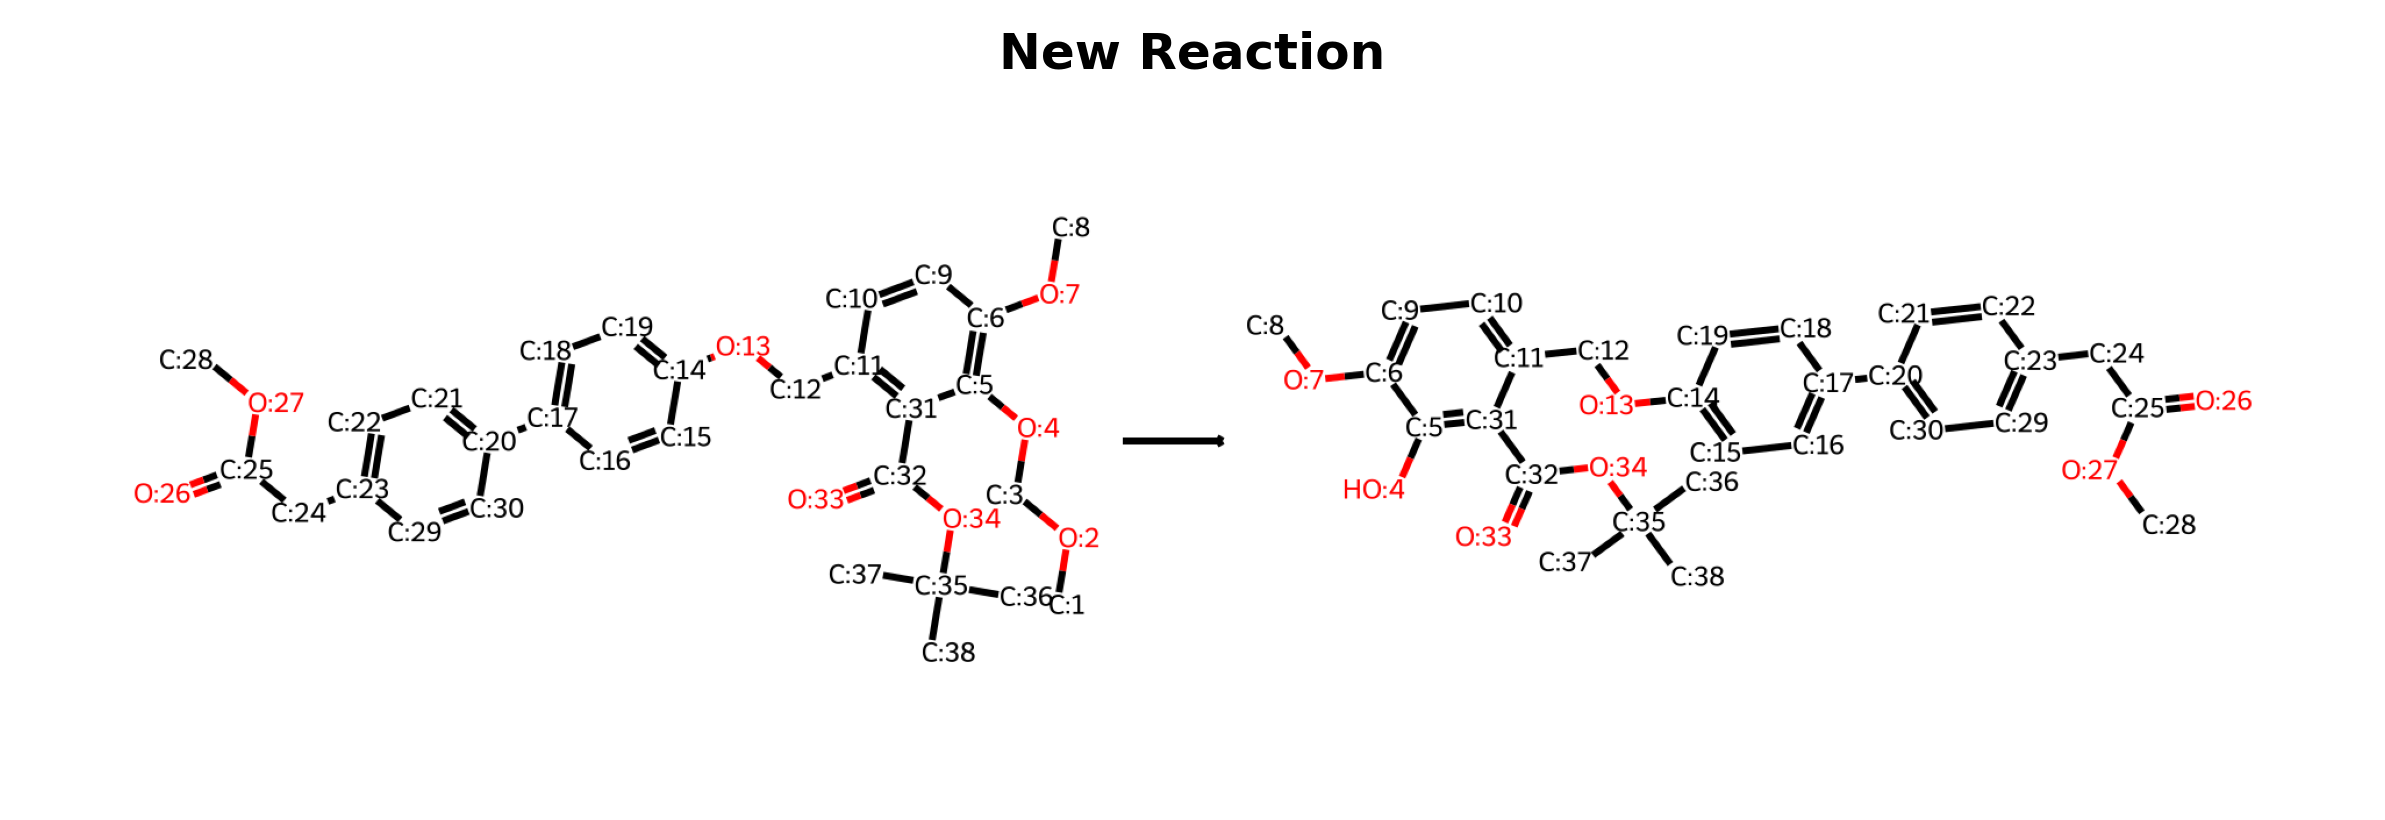

In [81]:
from SynRBL.SynVis.reaction_visualizer import ReactionVisualizer
vis = ReactionVisualizer()
vis.plot_reactions(golden[886],'old_reaction', 'old_reaction')

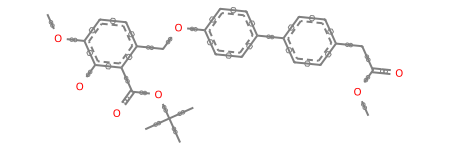

In [83]:
Chem.MolFromSmarts(mcs[886]['mcs_results'][0])

In [73]:
golden[885]

{'smiles': ['[CH3:1][NH:2][N:3]=[O:4]', None],
 'boundary_atoms_products': [[{'N': 1}], None],
 'nearest_neighbor_products': [[{'C': 4}], None],
 'issue': '',
 'Certainty': True,
 'R-id': 'USPTO_50K_1037',
 'sorted_reactants': ['[CH3:1][N:2]([N:3]=[O:4])[C:5]1=[N:6][c:7]2[cH:8][cH:9][s:10][c:11]2[C:12]([c:13]2[cH:14][cH:15][cH:16][cH:17][cH:18]2)=[N:19][CH2:20]1',
  '[CH3:21][N+:22]([O-:23])=[O:24]'],
 'carbon_balance_check': 'products',
 'mcs_results': ['[#6]1:&@[#6]:&@[#6]2:&@[#6](:&@[#16]:&@1)-&@[#6](=&@[#7]-&@[#6]-&@[#6]=&@[#7]-&@2)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1',
  '[#8]=,-;!@[#7](-&!@[#6])-,=;!@[#8]'],
 'old_reaction': '[CH:9]1=[CH:8][C:7]=2[N:6]=[C:5]([N:2]([CH3:1])[N:3]=[O:4])[CH2:20][N:19]=[C:12]([C:13]3=[CH:14][CH:15]=[CH:16][CH:17]=[CH:18]3)[C:11]=2[S:10]1.[O:24]=[N+:22]([CH3:21])[O-:23]>>[CH:9]1=[CH:8][C:7]=2[N:6]=[C:5]([CH2:21][N+:22]([O-:23])=[O:24])[CH2:20][N:19]=[C:12]([C:13]3=[CH:14][CH:15]=[CH:16][CH:17]=[CH:18]3)[C:11]=2[S:10]1'}

In [79]:
mcs[886]['mcs_results'][0]

'[#6]-&!@[#6](-&!@[#6])(-&!@[#6])-&!@[#8]-&!@[#6](-&!@[#6]1:&@[#6](:&@[#6](-&!@[#8]-&!@[#6]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6]-&!@[#8]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#6]-&!@[#6](-&!@[#8]-&!@[#6])=&!@[#8])-&!@[#8])=&!@[#8]'

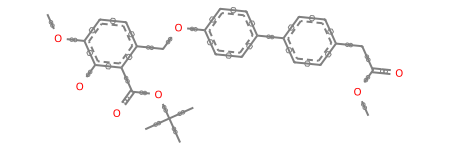

In [82]:
Chem.MolFromSmarts(mcs[886]['mcs_results'][0])